In [136]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv('SP500_close_price_no_missing.csv')

In [138]:
# Convert the values to numeric type
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Create a new DataFrame to store the log values
df_result = pd.DataFrame()

# Iterate through each column (starting from the second column) and calculate the log value
for column in df_numeric.columns[1:]:
    # Calculate the log (base 10) of (Price [t] / Price [t-1])
    df_result[column + '_log_value'] = np.log10(df_numeric[column] / df_numeric[column].shift(1))

# Skip the first row (since there is no previous row for the first row)
df_result = df_result.iloc[1:]

# Output the results to a new CSV file
df_result.to_csv('log_values_output.csv', index=False)

/var/folders/r7/z_mmy21d125cl_xgld2kbrlm0000gn/T/ipykernel_38587/2020285392.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_result[column + '_log_value'] = np.log10(df_numeric[column] / df_numeric[column].shift(1))
/var/folders/r7/z_mmy21d125cl_xgld2kbrlm0000gn/T/ipykernel_38587/2020285392.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_result[column + '_log_value'] = np.log10(df_numeric[column] / df_numeric[column].shift(1))
/var/folders/r7/z_mmy21d125cl_xgld2kbrlm0000gn/T/ipykernel_38587/2020285392.py:10: Perfo

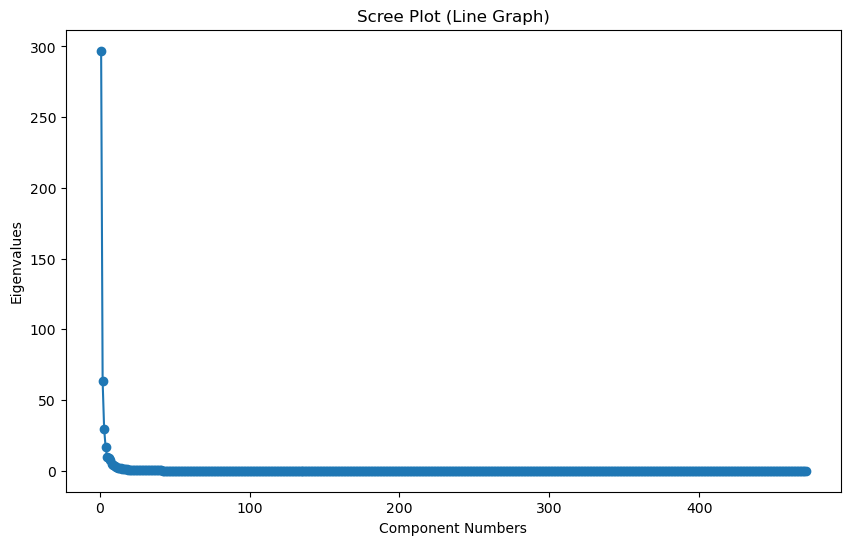

In [32]:
# Select only numeric columns (assuming your data is in columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Create a PCA instance
pca = PCA()

# Fit the data and transform it into the principal components
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratios and eigenvalues
explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

# Scree plot showing the distribution of variance in subsequent principal components as a line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Component Numbers')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot (Line Graph)')
plt.show()

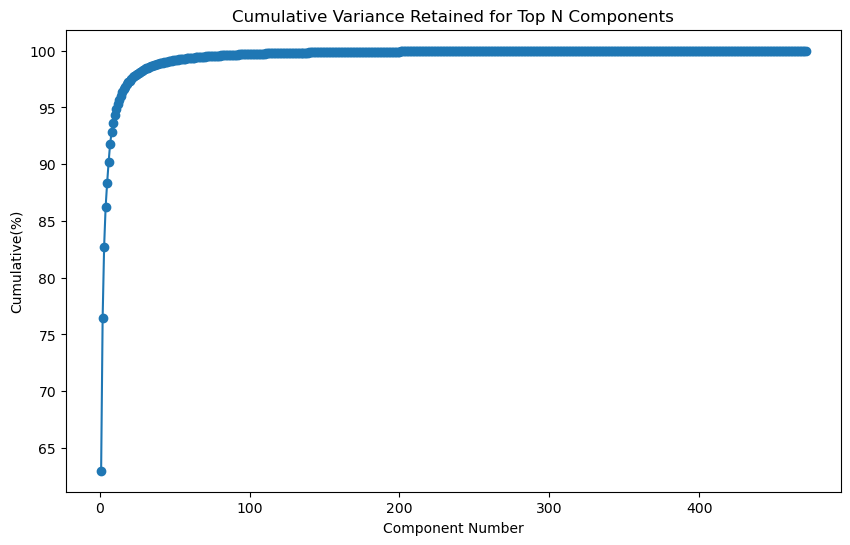

In [33]:
# Get the explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot showing the cumulative variance retained for top N components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Cumulative(%)')
plt.title('Cumulative Variance Retained for Top N Components')
plt.show()

In [24]:
# Select only numeric columns (assuming your data is in columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Create a PCA instance
pca = PCA()

# Fit the data and transform it into the principal components
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Find the number of components needed to capture at least 80% of the total variance
n_components_80_percent = np.argmax(cumulative_variance >= 0.8) + 1

print(f"Number of components needed to capture at least 80% of the total variance: {n_components_80_percent}")


Number of components needed to capture at least 80% of the total variance: 3


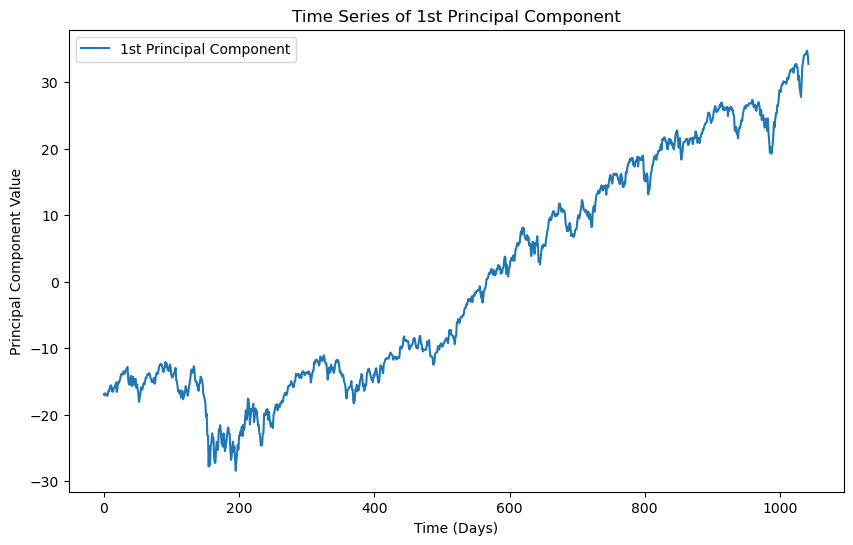

In [34]:
# Extract the 1st principal component as a time series
principal_component_series = X_pca[:, 0]

# Plot the time series of the 1st principal component
plt.figure(figsize=(10, 6))
plt.plot(df.index, principal_component_series, label='1st Principal Component')
plt.xlabel('Time (Days)')
plt.ylabel('Principal Component Value')
plt.title('Time Series of 1st Principal Component')
plt.legend()
plt.show()

In [119]:
# Create a PCA instance with two components
pca = PCA(n_components=2)

# Fit the data and transform it into the principal components
X_pca = pca.fit_transform(X_scaled)

# Extract the weights (loadings) for the 1st and 2nd principal components
weights_df = pd.DataFrame(pca.components_.T, columns=['1st PC', '2nd PC'])

# Save the weights to a CSV file
weights_df.to_csv('pca_weights.csv', index=False)

In [120]:
# Read the SP500_ticker.csv file containing ticker, company_name, and sector information
ticker_df = pd.read_csv('SP500_ticker.csv', encoding='Windows-1252')

# Read the PCA weights file
weights_df = pd.read_csv('pca_weights.csv')

# Extract the first and last columns from ticker_df for all rows
first_column_ticker = ticker_df.iloc[:, 0]
last_column_ticker = ticker_df.iloc[:, -1]

# Extract the first column from weights_df for all rows
first_column_weights = weights_df.iloc[:, 0]

# Create a new DataFrame with all rows
first_principle_df = pd.DataFrame({
    'ticker': first_column_ticker,
    'first_column_weights': first_column_weights,
    'last_column_ticker': last_column_ticker
})

# Save the new DataFrame to the CSV file
first_principle_df.to_csv('first_principle.csv', index=False)

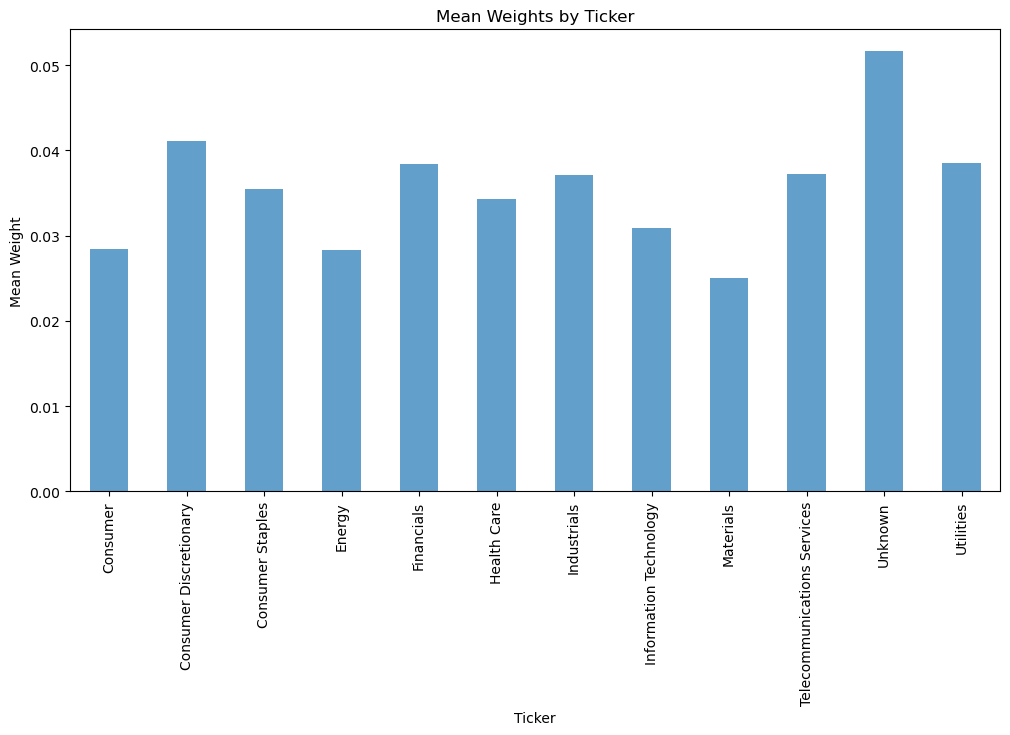

In [121]:
# Read the first_principle.csv file
first_principle_df = pd.read_csv('first_principle.csv')

# Remove leading and trailing spaces from all columns
first_principle_df = first_principle_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Save the cleaned DataFrame back to the CSV file if needed
first_principle_df.to_csv('first_principle_cleaned.csv', index=False)

# Remove leading and trailing spaces from all columns
first_principle_df = first_principle_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Save the cleaned DataFrame back to the CSV file if needed
first_principle_df.to_csv('first_principle_cleaned.csv', index=False)

# Group by the "last_column_ticker" and calculate the mean weights for each group
mean_weights_by_ticker = first_principle_df.groupby('last_column_ticker').mean(numeric_only=True)

# Plot the mean weights as a bar plot
plt.figure(figsize=(12, 6))
mean_weights_by_ticker['first_column_weights'].plot(kind='bar', alpha=0.7)
plt.xlabel('Ticker')
plt.ylabel('Mean Weight')
plt.title('Mean Weights by Ticker')
plt.show()

In [124]:
# Read the SP500_ticker.csv file containing ticker, company_name, and sector information
ticker_df = pd.read_csv('SP500_ticker.csv', encoding='Windows-1252')

# Read the PCA weights file
weights_df = pd.read_csv('pca_weights.csv')

# Extract the first and last columns from ticker_df for all rows
first_column_ticker = ticker_df.iloc[:, 0]
last_column_ticker = ticker_df.iloc[:, -1]

# Extract the first column from weights_df for all rows
first_column_weights = weights_df.iloc[:, 1]

# Create a new DataFrame with all rows
second_principle_df = pd.DataFrame({
    'ticker': first_column_ticker,
    'first_column_weights': first_column_weights,
    'last_column_ticker': last_column_ticker
})

# Save the new DataFrame to the CSV file
second_principle_df.to_csv('second_principle.csv', index=False)

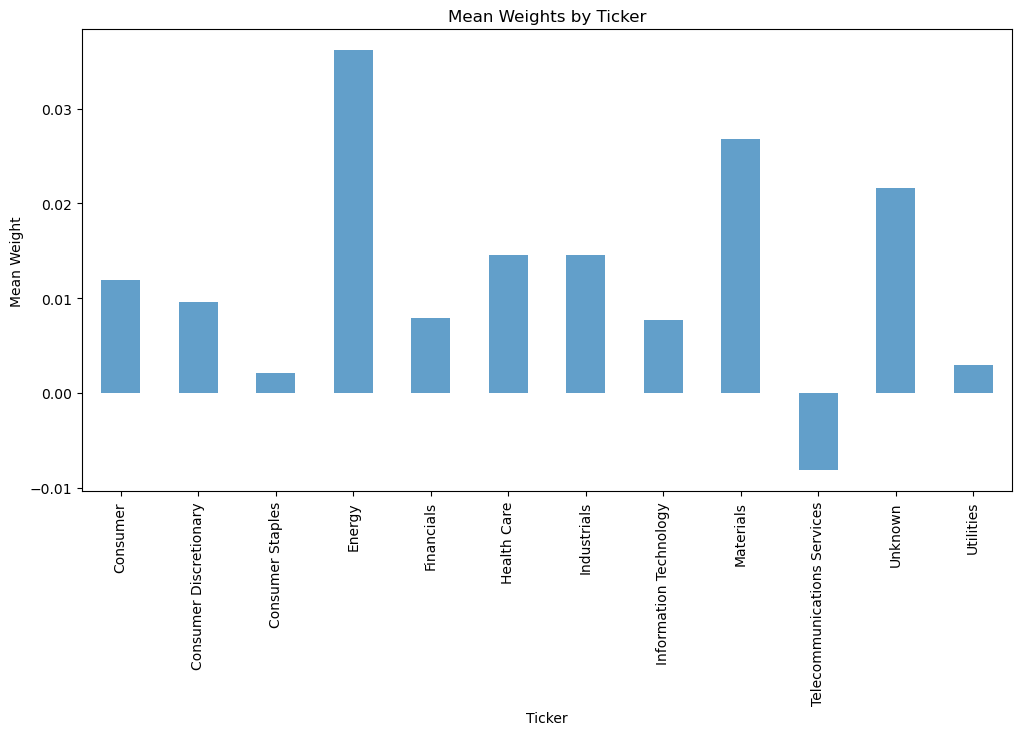

In [125]:
# Read the first_principle.csv file
second_principle_df = pd.read_csv('second_principle.csv')

# Remove leading and trailing spaces from all columns
second_principle_df = second_principle_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Save the cleaned DataFrame back to the CSV file if needed
second_principle_df.to_csv('second_principle_cleaned.csv', index=False)

# Remove leading and trailing spaces from all columns
second_principle_df = second_principle_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Save the cleaned DataFrame back to the CSV file if needed
second_principle_df.to_csv('second_principle_cleaned.csv', index=False)

# Group by the "last_column_ticker" and calculate the mean weights for each group
mean_weights_by_ticker = second_principle_df.groupby('last_column_ticker').mean(numeric_only=True)

# Plot the mean weights as a bar plot
plt.figure(figsize=(12, 6))
mean_weights_by_ticker['first_column_weights'].plot(kind='bar', alpha=0.7)
plt.xlabel('Ticker')
plt.ylabel('Mean Weight')
plt.title('Mean Weights by Ticker')
plt.show()